# A Simple Introduction to Facial Recognition (with Python codes)

## loading, resizing, and labeling images from. Index of /afs/cs.cmu.edu/project/theo-8/ml94faces/faces

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import os
import cv2

# Function to load and resize images from PGM files in a directory
def load_and_resize_images_from_directory(directory, target_size=(30, 32)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".pgm"):
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, target_size)
                images.append(img)
    return images
person1_images = load_and_resize_images_from_directory("ap4c")
person2_images = load_and_resize_images_from_directory("cprose")
person3_images = load_and_resize_images_from_directory("kw00")
person4_images = load_and_resize_images_from_directory("as60")
person5_images = load_and_resize_images_from_directory("avrim")


# Convert the lists of images into numpy arrays
X1 = np.array(person1_images)
X2 = np.array(person2_images)
X3 = np.array(person3_images)
X4 = np.array(person4_images)
X5 = np.array(person5_images)

# Create labels for each person's images
y1 = np.full(X1.shape[0], 1)
y2 = np.full(X2.shape[0], 2)
y3 = np.full(X3.shape[0], 3)
y4 = np.full(X4.shape[0], 4)
y5 = np.full(X5.shape[0], 5)

# Concatenate all the images and labels
X = np.concatenate((X1, X2, X3, X4, X5), axis=0)
y = np.concatenate((y1, y2, y3, y4, y5), axis=0)
print("X: ", X.shape)
print("y: ", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X:  (625, 32, 30)
y:  (625,)


# KNN

## evaluating different configurations for a (KNN) classifier 


Best value of k: 6


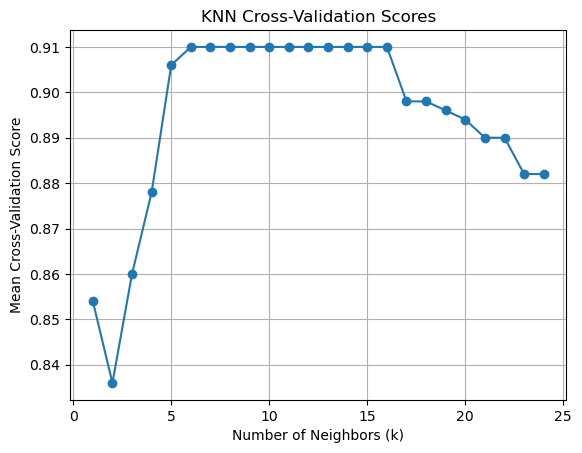

Accuracy: 0.92


In [2]:
from sklearn.model_selection import cross_val_score

# Define a range of k values to try
k_values = range(1, 25)  # Example: Try k from 1 to 20

# Dictionary to store mean cross-validation scores for each k
cv_scores = {}

# Perform k-fold cross-validation for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train.reshape(X_train.shape[0], -1), y_train, cv=5)  # 5-fold cross-validation
    cv_scores[k] = np.mean(scores)

# Find the best value of k with the highest mean cross-validation score
best_k = max(cv_scores, key=cv_scores.get)

print("\nBest value of k:", best_k)

import matplotlib.pyplot as plt

# Plot k values vs. mean cross-validation scores
plt.plot(list(cv_scores.keys()), list(cv_scores.values()), marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.title('KNN Cross-Validation Scores')
plt.grid(True)
plt.show()

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Evaluate the model
accuracy = knn.score(X_test.reshape(X_test.shape[0], -1), y_test)
print("Accuracy:", round(accuracy,2))

## confusion matrix and classification report

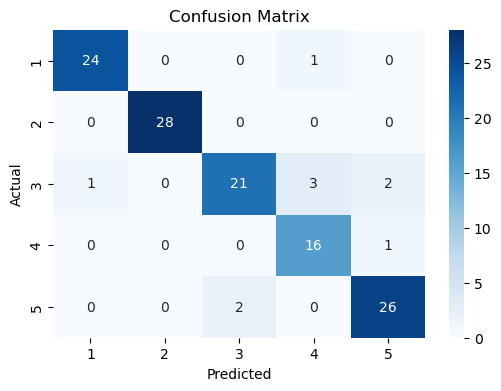

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        25
           2       1.00      1.00      1.00        28
           3       0.91      0.78      0.84        27
           4       0.80      0.94      0.86        17
           5       0.90      0.93      0.91        28

    accuracy                           0.92       125
   macro avg       0.91      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125



In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict labels for the test data
y_pred = knn.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report:")
print(report)


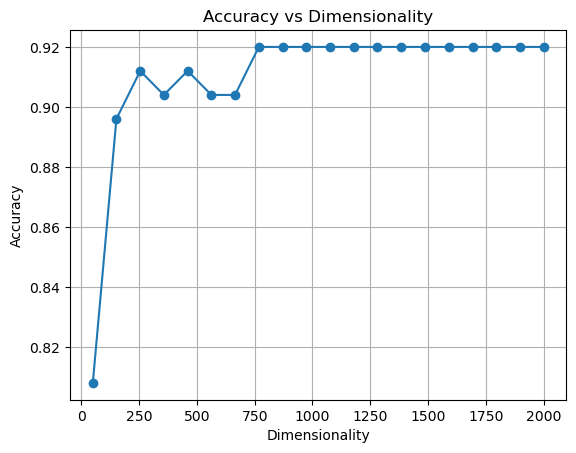

In [5]:
# Define a function to vary dimensionality and calculate accuracy
def evaluate_accuracy(X_train, X_test, y_train, y_test, dimensions):
    accuracies = []
    for dim in dimensions:
        # Reduce dimensionality (if needed)
        X_train_dim = X_train[:, :dim]
        X_test_dim = X_test[:, :dim]

        # Train K-NN model
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_dim, y_train)

        # Predict and calculate accuracy
        y_pred = knn.predict(X_test_dim)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Define different dimension values to test with consistent spacing
dimensions = np.linspace(50, 2000, num=20, dtype=int)  # 20 values from 50 to 2000 with consistent spacing

# Evaluate accuracy for each dimension
accuracies = evaluate_accuracy(X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1), y_train, y_test, dimensions)

# Plot the accuracy for different dimension values
plt.plot(dimensions, accuracies, marker='o')
plt.title('Accuracy vs Dimensionality')
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## LDA

Accuracy using LDA: 0.86


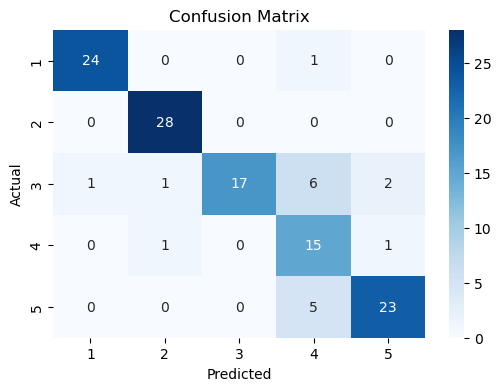

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        25
           2       0.93      1.00      0.97        28
           3       1.00      0.63      0.77        27
           4       0.56      0.88      0.68        17
           5       0.88      0.82      0.85        28

    accuracy                           0.86       125
   macro avg       0.87      0.86      0.85       125
weighted avg       0.89      0.86      0.86       125



In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predict labels for the test data
y_pred_lda = lda.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy using LDA:", round(accuracy_lda, 2))

# Calculate confusion matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_lda)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lda, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report:")
print(report)

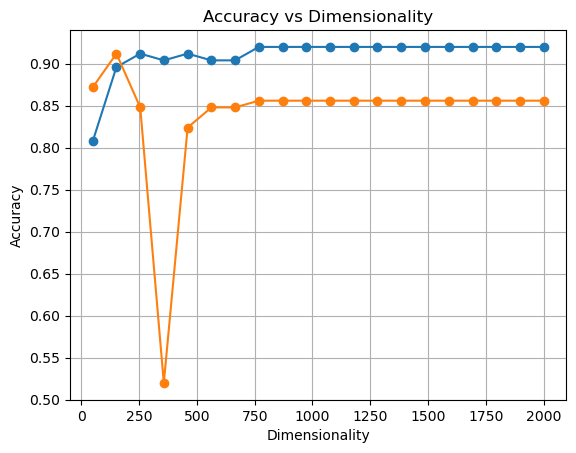

In [6]:
# Define a function to vary dimensionality and calculate accuracy
def evaluate_accuracy(X_train, X_test, y_train, y_test, dimensions):
    accuracies = []
    for dim in dimensions:
        # Reduce dimensionality (if needed)
        X_train_diml = X_train[:, :dim]
        X_test_diml = X_test[:, :dim]

        # Train LDA model
        lda.fit(X_train_diml, y_train)

        # Predict and calculate accuracy
        y_predl = lda.predict(X_test_diml)
        accuracy = accuracy_score(y_test, y_predl)
        accuracies.append(accuracy)
    return accuracies

# Define different dimension values to test with consistent spacing
dimensions_lda = np.linspace(50, 2000, num=20, dtype=int)  # 20 values from 50 to 2000 with consistent spacing

# Evaluate accuracy for each dimension
accuracies_lda = evaluate_accuracy(X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1), y_train, y_test, dimensions)

# Plot the accuracy for different dimension values
plt.plot(dimensions, accuracies, marker='o')
plt.plot(dimensions_lda, accuracies_lda, marker='o')

plt.title('Accuracy vs Dimensionality')
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


## eigenfaces and SVMs

PCA processing time: 0.35 seconds
Training time for SVM with PCA: 3.89 seconds
Accuracy using SVM with PCA: 0.85
Classification report for SVM with PCA:
              precision    recall  f1-score   support

    Person 1       0.96      0.96      0.96        25
    Person 2       0.72      1.00      0.84        28
    Person 3       1.00      0.59      0.74        27
    Person 4       0.82      0.82      0.82        17
    Person 5       0.86      0.86      0.86        28

    accuracy                           0.85       125
   macro avg       0.87      0.85      0.84       125
weighted avg       0.87      0.85      0.84       125



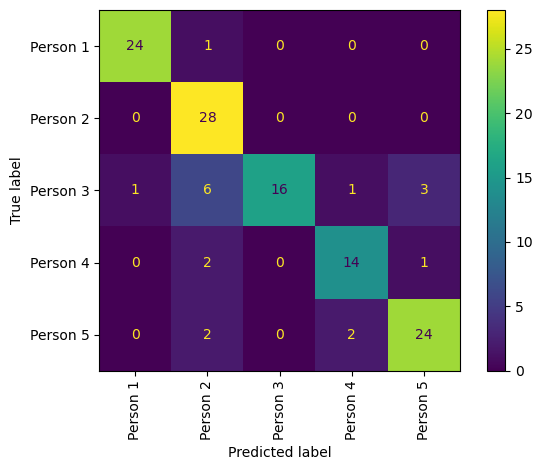

Training time for SVM without PCA: 8.08 seconds
Accuracy using SVM without PCA: 0.84
Classification report for SVM without PCA:
              precision    recall  f1-score   support

    Person 1       0.96      0.92      0.94        25
    Person 2       0.75      0.96      0.84        28
    Person 3       0.90      0.67      0.77        27
    Person 4       0.74      0.82      0.78        17
    Person 5       0.88      0.82      0.85        28

    accuracy                           0.84       125
   macro avg       0.85      0.84      0.84       125
weighted avg       0.85      0.84      0.84       125



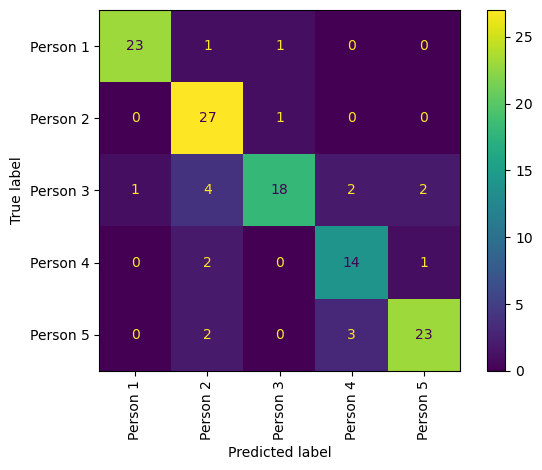

In [8]:
import time
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Reshape the data into a 2D array (this is based on your specific data structure)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Perform PCA
start_time_pca_process = time.time()
n_components = 150
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
end_time_pca_process = time.time()
pca_processing_time = end_time_pca_process - start_time_pca_process
print(f"PCA processing time: {pca_processing_time:.2f} seconds")

# Define parameter grid for RandomizedSearchCV
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}

# Train SVM classifier with PCA
start_time_pca_train = time.time()
clf_pca = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10)
clf_pca.fit(X_train_pca, y_train)
end_time_pca_train = time.time()
training_time_pca = end_time_pca_train - start_time_pca_train
print(f"Training time for SVM with PCA: {training_time_pca:.2f} seconds")

# Predict labels for test data using PCA
y_pred_pca = clf_pca.predict(X_test_pca)

# Calculate accuracy using SVM with PCA
accuracy_svm_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy using SVM with PCA:", round(accuracy_svm_pca, 2))

# Print classification report and display confusion matrix for SVM with PCA
target_names = ['Person 1', 'Person 2', 'Person 3', 'Person 4', 'Person 5']
print("Classification report for SVM with PCA:")
print(classification_report(y_test, y_pred_pca, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(clf_pca, X_test_pca, y_test, display_labels=target_names, xticks_rotation='vertical')
plt.tight_layout()
plt.show()

# Train SVM classifier without PCA
start_time_no_pca_train = time.time()
clf_no_pca = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10)
clf_no_pca.fit(X_train_scaled, y_train)
end_time_no_pca_train = time.time()
training_time_no_pca = end_time_no_pca_train - start_time_no_pca_train
print(f"Training time for SVM without PCA: {training_time_no_pca:.2f} seconds")

# Predict labels for test data without PCA
y_pred_no_pca = clf_no_pca.predict(X_test_scaled)

# Calculate accuracy using SVM without PCA
accuracy_svm_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Accuracy using SVM without PCA:", round(accuracy_svm_no_pca, 2))

# Print classification report and display confusion matrix for SVM without PCA
print("Classification report for SVM without PCA:")
print(classification_report(y_test, y_pred_no_pca, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(clf_no_pca, X_test_scaled, y_test, display_labels=target_names, xticks_rotation='vertical')
plt.tight_layout()
plt.show()


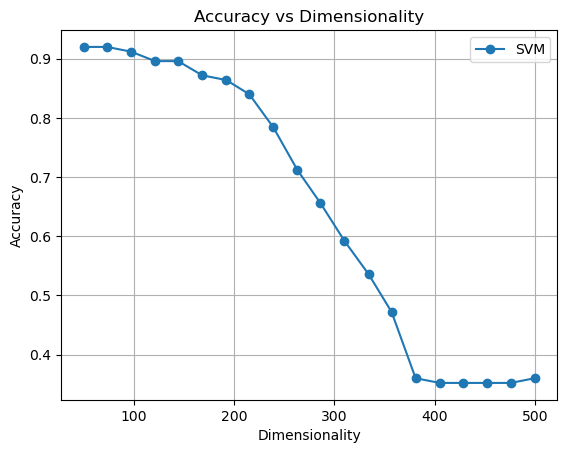

In [10]:
# Define a function to evaluate accuracy using SVM
def evaluate_accuracy_svm(X_train, X_test, y_train, y_test, dimensions):
    accuracies = []
    for dim in dimensions:
        # Perform PCA
        pca = PCA(n_components=dim, svd_solver="randomized", whiten=True)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM classifier
        svm = SVC(kernel="rbf", class_weight="balanced")
        svm.fit(X_train_pca, y_train)

        # Predict labels for test data
        y_pred = svm.predict(X_test_pca)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Define different dimension values to test with consistent spacing
dimensions = np.linspace(50, 500, num=20, dtype=int)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

# Evaluate accuracy for SVM
accuracies_svm = evaluate_accuracy_svm(X_train_scaled, X_test_scaled, y_train, y_test, dimensions)



# Plot the accuracy for SVM
plt.plot(dimensions, accuracies_svm, marker='o', label='SVM')

plt.title('Accuracy vs Dimensionality')
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## the performance of three different classifiers

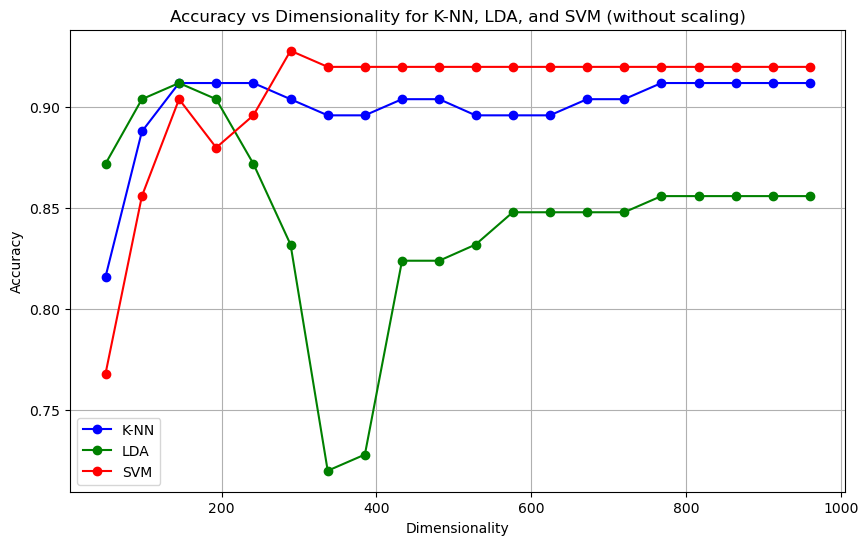

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Reshape the data into 2D array (since original data shapes are not given)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define a function to evaluate accuracy using K-NN
def evaluate_accuracy_knn(X_train, X_test, y_train, y_test, dimensions, best_k):
    accuracies = []
    for dim in dimensions:
        X_train_dim = X_train[:, :dim]
        X_test_dim = X_test[:, :dim]

        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_dim, y_train)
        y_pred = knn.predict(X_test_dim)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Define a function to evaluate accuracy using LDA
def evaluate_accuracy_lda(X_train, X_test, y_train, y_test, dimensions):
    accuracies = []
    lda = LDA()
    for dim in dimensions:
        X_train_dim = X_train[:, :dim]
        X_test_dim = X_test[:, :dim]

        lda.fit(X_train_dim, y_train)
        y_pred = lda.predict(X_test_dim)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Define a function to evaluate accuracy using SVM
def evaluate_accuracy_svm(X_train, X_test, y_train, y_test, dimensions):
    accuracies = []
    for dim in dimensions:
        X_train_dim = X_train[:, :dim]
        X_test_dim = X_test[:, :dim]

        svm = SVC(kernel='rbf', gamma='scale')
        svm.fit(X_train_dim, y_train)
        y_pred = svm.predict(X_test_dim)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Define different dimension values to test
dimensions = np.linspace(50, X_train_flat.shape[1], num=20, dtype=int)

# Evaluate accuracy for K-NN, LDA, and SVM
accuracies_knn = evaluate_accuracy_knn(X_train_flat, X_test_flat, y_train, y_test, dimensions, best_k=5)
accuracies_lda = evaluate_accuracy_lda(X_train_flat, X_test_flat, y_train, y_test, dimensions)
accuracies_svm = evaluate_accuracy_svm(X_train_flat, X_test_flat, y_train, y_test, dimensions)

# Plot the accuracy for K-NN, LDA, and SVM
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracies_knn, marker='o', linestyle='-', color='blue', label='K-NN')
plt.plot(dimensions, accuracies_lda, marker='o', linestyle='-', color='green', label='LDA')
plt.plot(dimensions, accuracies_svm, marker='o', linestyle='-', color='red', label='SVM')
plt.title('Accuracy vs Dimensionality for K-NN, LDA, and SVM (without scaling)')
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import numpy as np
from sklearn.decomposition import PCA

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

n_components = 150

h, w = X_train.shape[1], X_train.shape[2]

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train_flat.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train_flat)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)
print("done in %0.3fs" % (time() - t0))


Extracting the top 150 eigenfaces from 500 faces
done in 0.374s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.032s


## KNN after PCA


Best value of k after PCA: 6


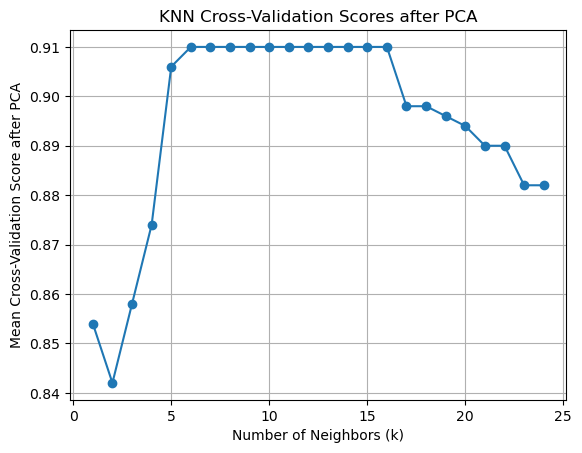

Accuracy after PCA: 0.92


In [22]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=40)  
X_train_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

# Perform k-fold cross-validation for each value of k using PCA-transformed data
cv_scores_pca = {}
for k in k_values:
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_pca, X_train_pca, y_train, cv=5)
    cv_scores_pca[k] = np.mean(scores)

# Find the best value of k with the highest mean cross-validation score after PCA
best_k_pca = max(cv_scores_pca, key=cv_scores_pca.get)

print("\nBest value of k after PCA:", best_k_pca)

# Plot k values vs. mean cross-validation scores after PCA
plt.plot(list(cv_scores_pca.keys()), list(cv_scores_pca.values()), marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score after PCA')
plt.title('KNN Cross-Validation Scores after PCA')
plt.grid(True)
plt.show()

# Train a KNN model with PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=best_k_pca)
knn_pca.fit(X_train_pca, y_train)

# Evaluate the model with PCA-transformed test data
accuracy_pca = knn_pca.score(X_test_pca, y_test)
print("Accuracy after PCA:", round(accuracy_pca, 2))
